In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!unzip /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set_splitted.zip

Archive:  /content/drive/MyDrive/AppliedAIinBiomedicine/final-assignment/training_set_splitted.zip
   creating: training_set_splitted/
   creating: training_set_splitted/test/
  inflating: training_set_splitted/test/S104_250.mat  
  inflating: training_set_splitted/test/S104_250_ann.mat  
  inflating: training_set_splitted/test/S104_250_rpk.mat  
  inflating: training_set_splitted/test/S105_250.mat  
  inflating: training_set_splitted/test/S105_250_ann.mat  
 extracting: training_set_splitted/test/S105_250_rpk.mat  
  inflating: training_set_splitted/test/S106_250.mat  
  inflating: training_set_splitted/test/S106_250_ann.mat  
 extracting: training_set_splitted/test/S106_250_rpk.mat  
  inflating: training_set_splitted/test/S107_250.mat  
  inflating: training_set_splitted/test/S107_250_ann.mat  
  inflating: training_set_splitted/test/S107_250_rpk.mat  
  inflating: training_set_splitted/test/S108_250.mat  
  inflating: training_set_splitted/test/S108_250_ann.mat  
  inflating: train

In [ ]:
input_dir = "/content/training_set_splitted/train"

In [ ]:
import os

# list the data present in the dataset
os.listdir(input_dir)

['S046_128_rpk.mat',
 'S088_250_rpk.mat',
 'S038_128.mat',
 'S057_128_ann.mat',
 'S002_128_ann.mat',
 'S039_128_rpk.mat',
 'S012_128.mat',
 'S095_250_ann.mat',
 'S038_128_rpk.mat',
 'S079_250_ann.mat',
 'S005_128.mat',
 'S007_128_rpk.mat',
 'S087_250_rpk.mat',
 'S045_128_rpk.mat',
 'S019_128.mat',
 'S003_128.mat',
 'S034_128_ann.mat',
 'S004_128_ann.mat',
 'S031_128_ann.mat',
 'S016_128_ann.mat',
 'S017_128_ann.mat',
 'S014_128_rpk.mat',
 'S017_128_rpk.mat',
 'S021_128.mat',
 'S037_128_rpk.mat',
 'S096_250.mat',
 'S090_250_ann.mat',
 'S003_128_rpk.mat',
 'S064_128_rpk.mat',
 'S100_250_ann.mat',
 'S038_128_ann.mat',
 'S005_128_rpk.mat',
 'S044_128.mat',
 'S039_128_ann.mat',
 'S080_250_ann.mat',
 'S024_128_rpk.mat',
 'S084_250_ann.mat',
 'S023_128_rpk.mat',
 'S085_250_ann.mat',
 'S058_128.mat',
 'S095_250_rpk.mat',
 'S049_128_ann.mat',
 'S026_128_rpk.mat',
 'S096_250_rpk.mat',
 'S063_128.mat',
 'S087_250_ann.mat',
 'S023_128_ann.mat',
 'S082_250.mat',
 'S032_128_ann.mat',
 'S062_128_rpk.

Each data sample present:

*   sample.mat : 2-lead ECG signal of a patient of lenght n
*   sample_ann.mat : contains the annotations for each R peak

*   sample_rpk.mat : contains the R peak locations of the signal





# Data loading

In [ ]:
# environment setup
from scipy.io import loadmat
import numpy as np, os, sys, joblib
import matplotlib.pyplot as plt
import math
from tqdm import tqdm
import pandas as pd
import random

#Setting random seed for reproducibility
#Remember to use always SEED for the functions that requires it (like Scikit models)
SEED = 1234
np.random.seed(SEED)
pd.core.common._random_stat = SEED
random.seed(SEED)
os.environ['PYTHONHASHSEED'] = str(SEED)


In [ ]:
# Utility function to load data

def load_data(ecg_file):
  ecg = loadmat(ecg_file)
  rpk_file = ecg_file.replace('.mat', '_rpk.mat')
  rpk = loadmat(rpk_file)
  ann_file = ecg_file.replace('.mat', '_ann.mat')
  ann = loadmat(ann_file)
  return ecg, rpk, ann

In [ ]:
# Get the ecg file for each sample and create a list of all ecgs
ecg_files = []

for f in os.listdir(input_dir):
  g = os.path.join(input_dir, f)
  if ('ann' not in g) and ('rpk' not in g):
    ecg_files.append(g)
num_files = len(ecg_files)

# Create lists that will contains each data types (ecg, labels, rpeaks) an filenames (a list which contains the original filename for each sample)
filenames = list()
ecgs = list()
rpks = list()
anns = list()

for i in range(num_files):
  ecg, rpk, ann = load_data(ecg_files[i])
  print(
        "\rLoading file: {}/{}"
            .format(i+1, num_files),
        end=""
    )
  ecgs.append(ecg)
  rpks.append(rpk)
  anns.append(ann)
  filenames.append(ecg_files[i])


#ecg = np.asarray(loadmat(g)['ecg'], dtype=np.float64)
#rpk = np.asarray(loadmat(input_dir + "/S083_250_rpk.mat")['rpeaks'], dtype=np.float64)
#ann = np.asarray(loadmat(input_dir + "/S083_250_ann.mat")['labels'])

Loading file: 90/90

# Plot label distribution

In [ ]:
classes_name = ['N', 'S', 'V']

In [ ]:
# list which contains all labels of each beat
all_labels = []

for sample in anns:
  for beat in sample['labels']:
    all_labels.append(beat)

len(all_labels)

# create a counts of each labels
values, counts = np.unique(all_labels, return_counts=True)
values, counts

(array(['N', 'S', 'V'], dtype='<U1'), array([196019,   9318,   7687]))

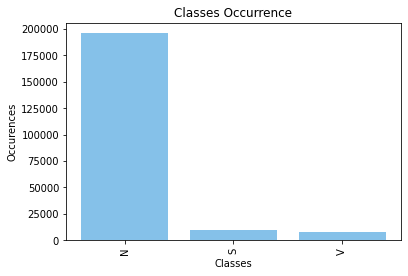

In [ ]:
# Plot labels distribution (of all beats of all patients)
plt.bar(x=classes_name,height=counts, facecolor ='#85c1e9')
plt.title("Classes Occurrence", color = "black")
plt.tick_params(axis="both", colors = "black")
plt.xlabel("Classes", color = "black")
plt.ylabel("Occurences", color = "black")
plt.xticks(rotation=90)
plt.yticks
plt.show()

# Plot intervals boxplot

In [ ]:
!pip install neurokit2

     |████████████████████████████████| 1.1 MB 31.3 MB/s 


In [ ]:
import neurokit2 as nk

In [ ]:
# Utility: given the filename of a signal it returns the sampling frequency
def ecg_freq(filename):
  if '128' in filename:
    return 128
  else:
    return 250

[230349]
230400
{'ECG_R_Peaks': array([    27,    148,    246, ..., 230126, 230215, 230349], dtype=int32), 'sampling_rate': 128}


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)


(-1.0, 3.0)

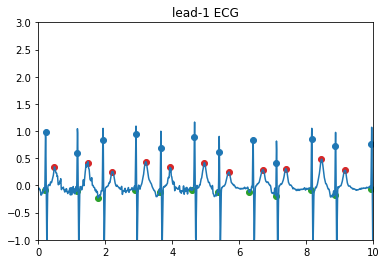

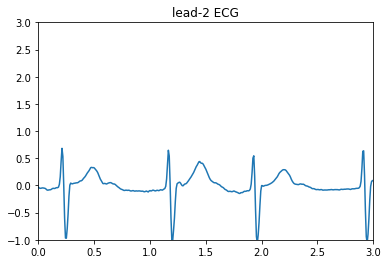

In [ ]:
# PLOT SIGNAL EXAMPLE

# extract a sample ecg 
ecg_sample = np.asarray(ecgs[1]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[1]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
 
#Extract peaks from traning set and their labels 
sample_rpeaks = rpks[1]['rpeaks'] 
rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling} 
print(sample_rpeaks[-1])
ecg_signal_1 = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2') 
ecg_signal_2 = nk.ecg_clean(ecg_sample[:,1], sampling_rate=sampling, method='neurokit2') 

print(len(ecg_signal_1))
print(rpeaks)

_, waves_peak = nk.ecg_delineate(ecg_signal_1, rpeaks, sampling_rate=sampling, method="dwt")
_, waves_peak_2 = nk.ecg_delineate(ecg_signal_2, rpeaks, sampling_rate=sampling, method="dwt")
# Plot an example of signal (last ecg in previous loop)

#drop null values
for key in waves_peak.keys():
 waves_peak[key] = [w for w in waves_peak[key] if math.isnan(w) == False]

#create waves_peak in time domain in order to plot the value in the time domain
waves_peak_td = dict()
waves_peak_td['ECG_P_Peaks'] = [w  for w in waves_peak['ECG_P_Peaks'] ]
waves_peak_td['ECG_Q_Peaks'] = [w / sampling for w in waves_peak['ECG_Q_Peaks'] ]
waves_peak_td['ECG_T_Peaks'] = [w / sampling for w in waves_peak['ECG_T_Peaks'] ]
waves_peak_td['ECG_R_Onsets'] = [w / sampling for w in waves_peak['ECG_R_Onsets'] ]
waves_peak_td['ECG_P_Onsets'] = [w / sampling for w in waves_peak['ECG_P_Onsets'] ]
waves_peak_td['ECG_T_Offsets'] = [w / sampling for w in waves_peak['ECG_T_Offsets'] ]

plt.plot(ecg_sample_, ecg_signal_1)
plt.title("lead-1 ECG")
plt.scatter(rpeaks['ECG_R_Peaks'] / sampling, ecg_signal_1[rpeaks['ECG_R_Peaks']])
plt.scatter(waves_peak_td['ECG_P_Peaks'], ecg_signal_1[waves_peak['ECG_P_Peaks']])
plt.scatter(waves_peak_td['ECG_Q_Peaks'], ecg_signal_1[waves_peak['ECG_Q_Peaks']])
plt.scatter(waves_peak_td['ECG_T_Peaks'], ecg_signal_1[waves_peak['ECG_T_Peaks']])

plt.xlim(0,10)
plt.ylim(-1,3)

plt.figure()
plt.title("lead-2 ECG")
plt.plot(ecg_sample_, ecg_signal_2)
plt.xlim(0,3)
plt.ylim(-1,3)

In [ ]:
# Exploration over some intervals of various single-beat signal

# lists that will contain PR and QR intervals
PR_N = list()
PR_S = list()
PR_V = list()

P_N = list()
P_S = list()
P_V = list()

QR_N = list()
QR_S = list()
QR_V = list()

# interval lists filling loop
for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  # Extract peaks from traning set and their labels
  sample_labels = anns[i]['labels']
  sample_rpeaks = rpks[i]['rpeaks']

  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')

  # Handling last beats (if last rpeak is >= to current ecg lenght, we remove it)
  if sample_rpeaks[-1] >= len(ecg_signal):
    sample_labels = sample_labels[:-1]
    sample_rpeaks = sample_rpeaks[:-1]

  #_,rpeaks = nk.ecg_peaks(ecg_signal, sampling_rate=sampling)
  # Building the dictionary with the rpeaks as the function of Neurokit wants
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}
  
  _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")
 
  #create waves_peak in time domain in order to plot the value in the time domain
  waves_peak_td = dict()

  #init the dictionary
  for k in waves_peak.keys():
    waves_peak_td[k] = list()

  for k in waves_peak.keys():
    for i in range(len(waves_peak[k])):
      if(math.isnan(waves_peak[k][i]) == False): #if is not nan, I divide the value for the frequency
        waves_peak_td[k].append(waves_peak[k][i] / sampling)
      else:
        waves_peak_td[k].append(waves_peak[k][i])  

  # add to the correct interval list the invterval of each beat of the current ecg sample

  for beat_index in range(len(sample_labels)):
    if sample_labels[beat_index] == 'N':
      try:
        P_N.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        print("Not valid P_N wave; Adding nan")
        P_N.append(np.asarray([math.nan]))
      try:
        PR_N.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid PR_N Interval; Adding nan")
        PR_N.append(np.asarray([math.nan]))
      try:  
        QR_N.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid QR_N Interval; Adding nan")
        QR_N.append(np.asarray([math.nan]))
    elif sample_labels[beat_index] == 'S':
      try:
        P_S.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        print("Not valid P_S wave; Adding nan")
        P_S.append(np.asarray([math.nan]))  
      try:
        PR_S.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid PR_S interval; Adding nan")
        PR_S.append(np.asarray([math.nan]))
      try:  
        QR_S.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid QR_S interval; Adding nan")
        QR_S.append(np.asarray([math.nan]))
    else:
      try:
        P_V.append(ecg_signal[waves_peak['ECG_P_Peaks'][beat_index]])
      except:
        print("Not valid P_V wave; Adding nan")
        P_V.append(np.asarray([math.nan]))  
      try:
        PR_V.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
      except:
        print("Not valid PR_V interval; Adding nan")
        PR_V.append(np.asarray([math.nan]))
      try: 
        QR_V.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
      except:
        print("Not valid QR_V interval; Adding nan")
        QR_V.append(np.asarray([math.nan]))

In [ ]:
print(len(PR_N))
print(len(PR_V))
print(len(PR_S))

7136
127
655


In [ ]:
#Flatten the structure of the array
PR_N = [item for sublist in PR_N for item in sublist]
PR_V = [item for sublist in PR_V for item in sublist]
PR_S = [item for sublist in PR_S for item in sublist]

In [ ]:
#Flatten the structure of the array
QR_N = [item for sublist in QR_N for item in sublist]
QR_V = [item for sublist in QR_V for item in sublist]
QR_S = [item for sublist in QR_S for item in sublist]

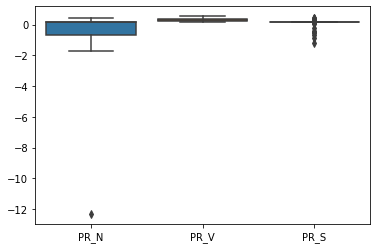

In [ ]:
import matplotlib.pyplot as plt
import pandas as pd
import seaborn as sns

boxplot_dictionary_PR = dict( PR_N = PR_N, PR_V = PR_V, PR_S = PR_S )
df_PR = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_dictionary_PR.items() ]))

sns.boxplot(data=df_PR)


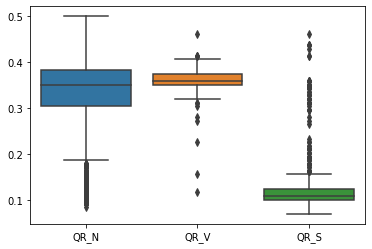

In [ ]:
boxplot_dictionary_QR = dict( QR_N = QR_N, QR_V = QR_V, QR_S = QR_S )
df_QR = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_dictionary_QR.items() ]))
sns.boxplot(data = df_QR)

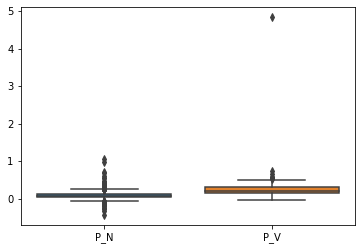

In [ ]:
boxplot_dictionary_P = dict( P_N = P_N, P_V = P_V, P_S = P_S )
df_P = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in boxplot_dictionary_P.items() ]))
sns.boxplot(data = df_P)

# Single heartbeat extraction

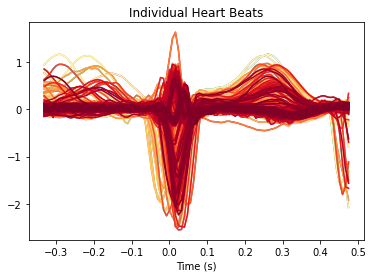

In [ ]:
# extract a sample ecg 
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
 
#Extract peaks from traning set and their labels 
sample_rpeaks = rpks[0]['rpeaks'] 
rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling} 
 
ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2') 
 
# extract heartbeats of current ecg 
ecg_heartbeats = nk.ecg_segment(ecg_cleaned=ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=sampling, show=True)

In [ ]:
# Try to extract each single heartbeat

# list of list that contains all heartbeats divided by patient
patient_heartbeats = []

for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  #ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')
  #Extract peaks from traning set and their labels
  sample_rpeaks = rpks[i]['rpeaks'] 
  # Handling last beats (if last rpeak is >= to current ecg lenght, we remove it)
  if sample_rpeaks[-1] >= len(ecg_signal):
    #sample_labels = sample_labels[:-1]
    sample_rpeaks = sample_rpeaks[:-1]
 
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}

  # extract heartbeats of current ecg
  ecg_heartbeats = nk.ecg_segment(ecg_cleaned=ecg_signal, rpeaks=rpeaks['ECG_R_Peaks'], sampling_rate=sampling)
  patient_heartbeats.append(ecg_heartbeats)

  

100%|██████████| 90/90 [10:18<00:00,  6.88s/it]


In [ ]:
# check a a single beat from both leads
patient_heartbeats[0]['1']

## HRV Features Extraction

This part is related to the extraction of the HRV features like RR interval,dRR_n = RR_{n+1} - RR_{n-1} (for each beat that is not first and last). 
Moreover, we extract a {2,5} minutes centered on an R-peak window and a 2 minute window before the R-peak and from this window we extract the mean and standard deviation of both RR and dRR and root mean square of successive differences (RMSSD).

*Example on a single signal*

In [ ]:
def get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, index, window_size_in_minutes = 2):
  #find a windows of dimension 2 minutes around the current R-peak
  cumulative_time = 0
  #window part before the index
  first_index = 0
  last_index = math.inf 
  for i in range(index, 0, -1):
    cumulative_time = cumulative_time + abs(sample_rpeaks_s[i] - sample_rpeaks_s[index])
    if(cumulative_time >= window_size_in_minutes * 60 / 2 and first_index == 0): #stop the extension of the window
      first_index = i

  cumulative_time = 0
  #window part after the index
  for j in range(index, len(sample_rpeaks_s), +1):
     cumulative_time = cumulative_time + abs(sample_rpeaks_s[j] - sample_rpeaks_s[index])
     if(cumulative_time >= window_size_in_minutes * 60 / 2 and last_index == math.inf): #stop the extension of the window
      last_index = j

  return rr_intervals[first_index:last_index], drr_intervals[first_index:last_index]

def get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, index, window_size_in_minutes = 2):
  #find a windows of dimension 2 minutes around the current R-peak
  cumulative_time = 0
  #window part before the index
  first_index = 0
  last_index = math.inf 
  for i in range(index, 0, -1):
    cumulative_time = cumulative_time + abs(sample_rpeaks_s[i] - sample_rpeaks_s[index])
    if(cumulative_time >= window_size_in_minutes * 60 / 2 and first_index == 0): #stop the extension of the window
      first_index = i

  return rr_intervals[first_index:index], drr_intervals[first_index:index]  

In [ ]:
#Utility function
def pow_list(list_of_items):
  return [item ** 2 for item in list_of_items]

length of the current sample is 30.0 minutes
first peak 2 min at 66
last peak 2 miin at 1830


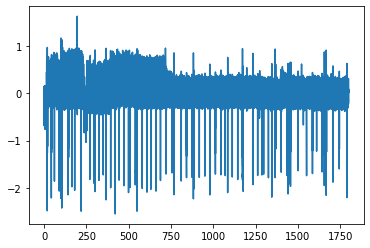

In [ ]:
# extract a sample ecg 
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
 
#Extract peaks from traning set and their labels 
sample_rpeaks = rpks[0]['rpeaks'] 
rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling} 
 
ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2') 
 
plt.plot(ecg_sample_, ecg_signal)

#Calculation of RR intervals
#conversion in seconds of R peaks
sample_rpeaks_s = [sample / sampling for sample in sample_rpeaks.flatten()]
rr_intervals = []

for i in range(len(sample_rpeaks_s) - 1):
  rr_intervals.append(sample_rpeaks_s[i+1] - sample_rpeaks_s[i])
#adding nan value for last peak
rr_intervals.append(math.nan)

#calculating dRR
drr_intervals = []

for i in range(len(rr_intervals)):
  if(i == 0 or i == len(rr_intervals) -1): #we need to skip first iteration and last iteration since we do not have the values
    drr_intervals.append(math.nan)
  else:  
    drr_intervals.append(rr_intervals[i+1] - rr_intervals[i])

#Extraction of a window of n minutes (n/2 minutes before and n/2 minutes after) centered on current RR
print("length of the current sample is",len(ecg_signal)/sampling/60, "minutes")

#Boundaries of the windows with R peak centered namely first index and last index are
first_peak_of_window_2_min = -1
last_peak_of_window_2_min = math.inf

first_peak_of_window_2_min_before = -1
first_peak_of_window_5_min_before = -1

first_peak_of_window_5_min = -1
last_peak_of_window_5_min = math.inf

for i in range(len(sample_rpeaks_s)):
  if(sample_rpeaks_s[i] >= 1.0*60 and first_peak_of_window_2_min == -1):
    first_peak_of_window_2_min = i
  if(sample_rpeaks_s[i] >= 2.0 * 60 and first_peak_of_window_2_min_before == -1):
    first_peak_of_window_2_min_before = i
  if(sample_rpeaks_s[i] >= 5.0 * 60 and first_peak_of_window_5_min_before == -1):
    first_peak_of_window_5_min_before = i


for i in range(len(sample_rpeaks_s)):
  if(sample_rpeaks_s[i] >= 2.5*60 and first_peak_of_window_5_min == -1):
    first_peak_of_window_5_min = i

#starting from the last index in order to get the last index that satisfy the condition
for i in range(len(sample_rpeaks_s) - 1, 0, -1):
  if(sample_rpeaks_s[i] < 29.0 * 60  and last_peak_of_window_2_min == math.inf):
    last_peak_of_window_2_min = i 

for i in range(len(sample_rpeaks_s) - 1, 0, -1):
  if(sample_rpeaks_s[i] < 27.5 * 60  and last_peak_of_window_5_min == math.inf):
    last_peak_of_window_5_min = i 

print("first peak 2 min at", first_peak_of_window_2_min)
print("last peak 2 miin at", last_peak_of_window_2_min)

#fill the first and the last position of the values related to windows measures with nan
rr_mean_2_min_centered = []
rr_std_2_min_centered = []
rr_mean_5_min_centered = []
rr_std_5_min_centered = []

rr_mean_2_min_before = []
rr_std_2_min_before = []
rr_mean_5_min_before = []
rr_std_5_min_before = []

rmssd_2_min_centered = []
rmssd_5_min_centered = []
rmssd_2_min_before = []
rmssd_5_min_before = []

drr_mean_2_min_centered = []
drr_std_2_min_centered = []
drr_mean_5_min_centered = []
drr_std_5_min_centered = []

drr_mean_2_min_before = []
drr_std_2_min_before = []
drr_mean_5_min_before = []
drr_std_5_min_before= []

for i in range(len(sample_rpeaks_s)):
  if(i <= first_peak_of_window_2_min or i >= last_peak_of_window_2_min):
    rr_mean_2_min_centered.append(math.nan)
    rr_std_2_min_centered.append(math.nan)
    drr_mean_2_min_centered.append(math.nan)
    drr_std_2_min_centered.append(math.nan)
    rmssd_2_min_centered.append(math.nan)
  else:
    rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, i)
    rr_mean_2_min_centered.append(np.nanmean(rr_in_window))
    rr_std_2_min_centered.append(np.nanstd(rr_in_window))
    drr_mean_2_min_centered.append(np.nanmean(drr_in_window))
    drr_std_2_min_centered.append(np.nanstd(drr_in_window))
    rmssd_2_min_centered.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))


for i in range(len(sample_rpeaks_s)):
  if(i <= first_peak_of_window_5_min or i >= last_peak_of_window_5_min):
    rr_mean_5_min_centered.append(math.nan)
    rr_std_5_min_centered.append(math.nan)
    drr_mean_5_min_centered.append(math.nan)
    drr_std_5_min_centered.append(math.nan)
    rmssd_5_min_centered.append(math.nan)
  else:
    rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=5)
    rr_mean_5_min_centered.append(np.nanmean(rr_in_window))
    rr_std_5_min_centered.append(np.nanstd(rr_in_window))
    drr_mean_5_min_centered.append(np.nanmean(drr_in_window))
    drr_std_5_min_centered.append(np.nanstd(drr_in_window))
    rmssd_5_min_centered.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))

for i in range(len(sample_rpeaks_s)):
  if(i <= first_peak_of_window_2_min_before):
    rr_mean_2_min_before.append(math.nan)
    rr_std_2_min_before.append(math.nan)
    drr_mean_2_min_before.append(math.nan)
    drr_std_2_min_before.append(math.nan)
    rmssd_2_min_before.append(math.nan)
  else:
    rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=2)
    rr_mean_2_min_before.append(np.nanmean(rr_in_window))
    rr_std_2_min_before.append(np.nanstd(rr_in_window))
    drr_mean_2_min_before.append(np.nanmean(drr_in_window))
    drr_std_2_min_before.append(np.nanstd(drr_in_window))  
    rmssd_2_min_before.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))

for i in range(len(sample_rpeaks_s)):
  if(i <= first_peak_of_window_5_min_before):
    rr_mean_5_min_before.append(math.nan)
    rr_std_5_min_before.append(math.nan)
    drr_mean_5_min_before.append(math.nan)
    drr_std_5_min_before.append(math.nan)
    rmssd_5_min_before.append(math.nan)
  else:
    rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=5)
    rr_mean_5_min_before.append(np.nanmean(rr_in_window))
    rr_std_5_min_before.append(np.nanstd(rr_in_window))
    drr_mean_5_min_before.append(np.nanmean(drr_in_window))
    drr_std_5_min_before.append(np.nanstd(drr_in_window)) 
    rmssd_5_min_before.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))     

In [ ]:
hpv_features = dict( rr_intervals = rr_intervals, drr_intervals = drr_intervals, rr_mean_2_min_window_centered = rr_mean_2_min_centered,
                    rr_std_2_min_window_centered = rr_std_2_min_centered, drr_mean_2_min_window_centered = drr_mean_2_min_centered, drr_std_2_min_window_centered = drr_std_2_min_centered, rmssd_2_min_window_centered = rmssd_2_min_centered,
                    rr_std_5_min_window_centered = rr_std_5_min_centered, drr_mean_5_min_window_centered = drr_mean_5_min_centered, drr_std_5_min_window_centered = drr_std_5_min_centered, rmssd_5_min_window_centered = rmssd_5_min_centered,
                    rr_mean_2_min_before = rr_mean_2_min_before, rr_std_2_min_window_before = rr_std_2_min_before, drr_mean_2_min_window_before = drr_mean_2_min_before, drr_std_2_min_window_before = drr_std_2_min_before, rmssd_2_min_window_before = rmssd_2_min_before,
                    rr_mean_5_min_window_before = rr_mean_5_min_before, rr_std_5_min_window_before = rr_std_5_min_before, drr_mean_5_min_window_before = drr_mean_5_min_before, drr_std_5_min_before = drr_std_5_min_before, rmssd_5_min_window_before = rmssd_5_min_before)
hpv_features = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in hpv_features.items() ]))
hpv_features.describe()

,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before
count,1892.000000,1890.000000,1763.000000,1763.000000,1763.000000,1763.000000,1763.000000,1576.000000,1576.000000,1576.000000,1576.000000,1762.000000,1762.000000,1762.000000,1762.000000,1762.000000,1577.000000,1577.000000,1577.000000,1577.000000,1577.000000
mean,0.950866,0.000058,0.952357,0.080110,-0.000013,0.087729,0.957525,0.085138,-0.000078,0.089886,0.956173,0.953908,0.060740,-0.000002,0.070081,0.958233,0.951142,0.071937,-0.000092,0.077927,0.955826
std,0.106743,0.104831,0.037627,0.056572,0.006714,0.052515,0.034078,0.043092,0.003915,0.029915,0.026400,0.048831,0.065320,0.012648,0.069517,0.045489,0.039418,0.058366,0.008082,0.053925,0.034647
min,0.429688,-1.007812,0.706731,0.005467,-0.049361,0.005362,0.746216,0.011714,-0.038373,0.007505,0.829790,0.520312,0.003479,-0.098722,0.003890,0.535321,0.654687,0.004695,-0.032552,0.005558,0.698757
25%,0.953125,-0.007812,0.935068,0.037012,-0.001420,0.059840,0.941597,0.048127,-0.001085,0.071583,0.943716,0.933594,0.011275,-0.002841,0.010534,0.938526,0.930990,0.016972,-0.001736,0.018780,0.938312
50%,0.968750,0.000000,0.952770,0.062132,0.000000,0.089082,0.957314,0.090362,0.000000,0.086708,0.957099,0.960227,0.022108,0.000000,0.029438,0.962345,0.954861,0.056909,0.000000,0.082649,0.958777
75%,0.992188,0.007812,0.971236,0.119625,0.001359,0.114148,0.973445,0.106993,0.000893,0.106109,0.970229,0.980824,0.088793,0.002131,0.122912,0.980885,0.973958,0.123561,0.001645,0.119079,0.974948
max,2.062500,0.875000,1.074777,0.294074,0.049361,0.312936,1.099836,0.266370,0.018973,0.255151,1.054283,1.163281,0.327400,0.095881,0.453333,1.202468,1.044577,0.301849,0.035362,0.241611,1.046376


In [ ]:
hpv_features.head(500)

,rr_intervals,drr_intervals,rr_mean_2_min_window_centered,rr_std_2_min_window_centered,drr_mean_2_min_window_centered,drr_std_2_min_window_centered,rmssd_2_min_window_centered,rr_std_5_min_window_centered,drr_mean_5_min_window_centered,drr_std_5_min_window_centered,rmssd_5_min_window_centered,rr_mean_2_min_before,rr_std_2_min_window_before,drr_mean_2_min_window_before,drr_std_2_min_window_before,rmssd_2_min_window_before,rr_mean_5_min_window_before,rr_std_5_min_window_before,drr_mean_5_min_window_before,drr_std_5_min_before,rmssd_5_min_window_before
0,0.914062,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,0.890625,-0.007812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,0.906250,0.007812,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,0.898438,0.000000,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,0.906250,0.015625,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
495,0.992188,0.015625,0.943274,0.109162,-0.003057,0.149918,0.949570,0.088088,-0.001953,0.120023,0.953946,0.910807,0.142652,0.000651,0.207251,0.921911,0.932292,0.120441,0.001302,0.169436,0.940039
496,1.007812,0.000000,0.941576,0.108690,-0.003397,0.149920,0.947829,0.087975,-0.001953,0.120023,0.953071,0.910807,0.142652,0.001953,0.207292,0.921911,0.933160,0.120813,0.002604,0.169451,0.940948
497,0.992188,-0.015625,0.937500,0.110159,-0.003906,0.153270,0.943950,0.087869,-0.001953,0.120023,0.951981,0.905540,0.148099,0.001420,0.216502,0.917570,0.934896,0.121646,0.002604,0.169451,0.942777
498,0.992188,0.000000,0.935724,0.109576,-0.002841,0.153266,0.942118,0.087736,-0.001519,0.120058,0.951104,0.905540,0.148099,0.001420,0.216502,0.917570,0.935764,0.121995,0.001736,0.169502,0.943683


### Extraction of the HPV features on the whole Dataset

In [77]:
# list of list that contains all hpv features divided by patient
patient_hpv = []

rr_mean_2_min_centered = []
rr_std_2_min_centered = []
rr_mean_5_min_centered = []
rr_std_5_min_centered = []

rr_mean_2_min_before = []
rr_std_2_min_before = []
rr_mean_5_min_before = []
rr_std_5_min_before = []

rmssd_2_min_centered = []
rmssd_5_min_centered = []
rmssd_2_min_before = []
rmssd_5_min_before = []

drr_mean_2_min_centered = []
drr_std_2_min_centered = []
drr_mean_5_min_centered = []
drr_std_5_min_centered = []

drr_mean_2_min_before = []
drr_std_2_min_before = []
drr_mean_5_min_before = []
drr_std_5_min_before= []

for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  sampling = ecg_freq(filenames[i])
  #Extract peaks from traning set and their labels
  sample_rpeaks = rpks[i]['rpeaks']
  #Calculation of RR intervals
  #conversion in seconds of R peaks
  sample_rpeaks_s = [sample / sampling for sample in sample_rpeaks.flatten()]
  rr_intervals = []

  for i in range(len(sample_rpeaks_s) - 1):
    rr_intervals.append(sample_rpeaks_s[i+1] - sample_rpeaks_s[i])
  #adding nan value for last peak
  rr_intervals.append(math.nan)

  #calculating dRR
  drr_intervals = []

  for i in range(len(rr_intervals)):
    if(i == 0 or i == len(rr_intervals) -1): #we need to skip first iteration and last iteration since we do not have the values
      drr_intervals.append(math.nan)
    else:  
      drr_intervals.append(rr_intervals[i+1] - rr_intervals[i])

  #Extraction of a window of n minutes (n/2 minutes before and n/2 minutes after) centered on current RR
  #Boundaries of the windows namely first index and last index are
  first_peak_of_window_2_min = -1
  last_peak_of_window_2_min = math.inf

  first_peak_of_window_2_min_before = -1
  first_peak_of_window_5_min_before = -1

  first_peak_of_window_5_min = -1
  last_peak_of_window_5_min = math.inf

  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 1.0*60 and first_peak_of_window_2_min == -1):
     first_peak_of_window_2_min = i
   if(sample_rpeaks_s[i] >= 2.0 * 60 and first_peak_of_window_2_min_before == -1):
     first_peak_of_window_2_min_before = i
   if(sample_rpeaks_s[i] >= 5.0 * 60 and first_peak_of_window_5_min_before == -1):
     first_peak_of_window_5_min_before = i


  for i in range(len(sample_rpeaks_s)):
   if(sample_rpeaks_s[i] >= 2.5*60 and first_peak_of_window_5_min == -1):
     first_peak_of_window_5_min = i

 #starting from the last index in order to get the last index that satisfy the condition
  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 29.0 * 60  and last_peak_of_window_2_min == math.inf):
      last_peak_of_window_2_min = i 

  for i in range(len(sample_rpeaks_s) - 1, 0, -1):
    if(sample_rpeaks_s[i] < 27.5 * 60  and last_peak_of_window_5_min == math.inf):
      last_peak_of_window_5_min = i 
 

 #fill the first and the last position of the values related to windows measures with nan


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min or i >= last_peak_of_window_2_min):
      rr_mean_2_min_centered.append(math.nan)
      rr_std_2_min_centered.append(math.nan)
      drr_mean_2_min_centered.append(math.nan)
      drr_std_2_min_centered.append(math.nan)
      rmssd_2_min_centered.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, i)
      rr_mean_2_min_centered.append(np.nanmean(rr_in_window))
      rr_std_2_min_centered.append(np.nanstd(rr_in_window))
      drr_mean_2_min_centered.append(np.nanmean(drr_in_window))
      drr_std_2_min_centered.append(np.nanstd(drr_in_window))
      rmssd_2_min_centered.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))


  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min or i >= last_peak_of_window_5_min):
      rr_mean_5_min_centered.append(math.nan)
      rr_std_5_min_centered.append(math.nan)
      drr_mean_5_min_centered.append(math.nan)
      drr_std_5_min_centered.append(math.nan)
      rmssd_5_min_centered.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_centered(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_centered.append(np.nanmean(rr_in_window))
      rr_std_5_min_centered.append(np.nanstd(rr_in_window))
      drr_mean_5_min_centered.append(np.nanmean(drr_in_window))
      drr_std_5_min_centered.append(np.nanstd(drr_in_window))
      rmssd_5_min_centered.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))
 
  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_2_min_before):
      rr_mean_2_min_before.append(math.nan)
      rr_std_2_min_before.append(math.nan)
      drr_mean_2_min_before.append(math.nan)
      drr_std_2_min_before.append(math.nan)
      rmssd_2_min_before.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=2)
      rr_mean_2_min_before.append(np.nanmean(rr_in_window))
      rr_std_2_min_before.append(np.nanstd(rr_in_window))
      drr_mean_2_min_before.append(np.nanmean(drr_in_window))
      drr_std_2_min_before.append(np.nanstd(drr_in_window))  
      rmssd_2_min_before.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window)))

  for i in range(len(sample_rpeaks_s)):
    if(i <= first_peak_of_window_5_min_before):
      rr_mean_5_min_before.append(math.nan)
      rr_std_5_min_before.append(math.nan)
      drr_mean_5_min_before.append(math.nan)
      drr_std_5_min_before.append(math.nan)
      rmssd_5_min_before.append(math.nan)
    else:
      rr_in_window, drr_in_window = get_RRs_in_window_before(rr_intervals, drr_intervals, sample_rpeaks_s, i, window_size_in_minutes=5)
      rr_mean_5_min_before.append(np.nanmean(rr_in_window))
      rr_std_5_min_before.append(np.nanstd(rr_in_window))
      drr_mean_5_min_before.append(np.nanmean(drr_in_window))
      drr_std_5_min_before.append(np.nanstd(drr_in_window)) 
      rmssd_5_min_before.append(math.sqrt(np.sum(pow_list(rr_in_window))/len(rr_in_window))) 

100%|██████████| 90/90 [20:48<00:00, 13.87s/it]


# Intra patient Beat Cross-correlation

Here we try to extract features regarding the cross-correlation between beats. In the following we consider for now only whole beat template, we then could try to use also QRS template and others...

114
216
228
330


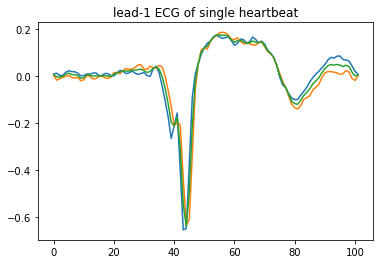

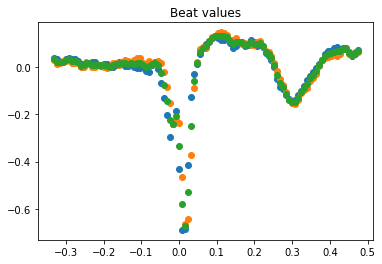

In [ ]:
# Extract the patient heratbeats
patient = patient_heartbeats[0]

beat_one = patient['2']
beat_two = patient['3']

# extract same portion in the ecg signal
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
# obtain indexes of the single heartbeat in the ecg
indexes = beat_one['Index'].values
#indexes = [x for i, x in enumerate(indexes) if x >= 0]
start_index = indexes[0]
end_index = indexes[len(indexes)-1]
print(start_index)
print(end_index)

ecg_signal_1 = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 

# extract same portion in the ecg signal
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
# obtain indexes of the single heartbeat in the ecg
indexes = beat_two['Index'].values
#indexes = [x for i, x in enumerate(indexes) if x >= 0]
start_index = indexes[0]
end_index = indexes[len(indexes)-1]
print(start_index)
print(end_index)

# extract the beat signal
ecg_signal_2 = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 
#ecg_signal_2 = nk.ecg_clean(ecg_sample[start_index:end_index,1], sampling_rate=sampling, method='neurokit2') 

ecg_signal_merged = ecg_signal_1 + ecg_signal_2
ecg_signal_merged = ecg_signal_merged/2

plt.plot(ecg_signal_1)
plt.plot(ecg_signal_2)
plt.plot(ecg_signal_merged)
plt.title("lead-1 ECG of single heartbeat")

# Plot beat samples to see if it effectively represent a beat
plt.figure()
plt.title("Beat values")
plt.scatter(beat_one['Signal'].index, beat_one['Signal'].values)

# Plot beat samples of an other beat
plt.scatter(beat_two['Signal'].index, beat_two['Signal'].values)

# Take the average of the values of the 2 arrays and plot it
a = beat_one['Signal'].values
b = beat_two['Signal'].values
c = np.add(a, b)
c = c/2

plt.scatter(beat_two['Signal'].index, c)

#create the new beat as a pandas dataframe

# create the new Signal series
index = beat_one['Signal'].index
s = pd.Series(c, index=index)

In [82]:
# Function to create intra-patient templates given the considered beat
# It requires the patient_heartbeats object obtained above
# It returns NaN if considered beat cannot have a window of size window (border beats)
# It return a template in other cases
def create_beat_template(patient_heartbeats, patient_index, beat_index, window):
  # extract beat segments from considere patient
  patient_beats = patient_heartbeats[patient_index]
  # extract the considered beat
  beat = patient_beats['{}'.format(beat_index)]

  # sanitization: discard beats at border of ecg
  if beat_index < window or beat_index > (len(patient_beats)-window/2):
    return math.nan
  #sanitization: if first window beat has negative indexes we stop the process
  first_window_beat = patient_beats['{}'.format(beat_index - int(window/2))]
  first_window_beat_indexes = first_window_beat['Index'].values
  if first_window_beat_indexes[0] < 0:
    return math.nan
  
  # create the template model with size window centered on beat
  # extract same portion in the ecg signal
  window_beats = []
  for i in range(window+1):
    if beat_index - int(window/2) + i != beat_index:
      tmp_beat = patient_beats['{}'.format(beat_index - int(window/2) + i)]
      ecg_sample = np.asarray(ecgs[patient_index]['ecg'], dtype=np.float64) 
      sampling = ecg_freq(filenames[patient_index]) 
      ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
      # obtain indexes of the single heartbeat in the ecg
      indexes = tmp_beat['Index'].values
      #indexes = [x for i, x in enumerate(indexes) if x >= 0]
      start_index = indexes[0]
      end_index = indexes[len(indexes)-1]
      # lead one heartbeat signal
      tmp_ecg_signal = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 
      window_beats.append(tmp_ecg_signal)

  # Finally we create the beat template averaging the beats signal of the beats inside the window
  template = sum(window_beats)
  template = template/len(window_beats)
  return template

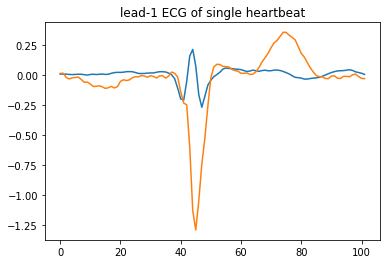

In [83]:
template = create_beat_template(patient_heartbeats, patient_index=0, beat_index=50, window=20)

#Plot the template
plt.plot(template)
plt.title("lead-1 ECG of single heartbeat")

patient = patient_heartbeats[0]
beat_to_match = patient['50']

# Plot also the beat to match with its template
ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
ecg_sample_= np.arange(0, ecg_sample.shape[0]/sampling, 1/sampling)
# obtain indexes of the single heartbeat in the ecg
indexes = beat_to_match['Index'].values
start_index = indexes[0]
end_index = indexes[len(indexes)-1]

ecg_beat_to_match = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 
plt.plot(ecg_beat_to_match)

In [84]:
# Extract cross correlation features using a signal and the corresponding template

patient_index = 0
beat_index = 50
window = 20

template = create_beat_template(patient_heartbeats, patient_index=patient_index, beat_index=beat_index, window=window)
patient = patient_heartbeats[patient_index]
beat_to_match = patient['{}'.format(beat_index)]

ecg_sample = np.asarray(ecgs[0]['ecg'], dtype=np.float64) 
sampling = ecg_freq(filenames[0]) 
# obtain indexes of the single heartbeat in the ecg
indexes = beat_to_match['Index'].values
start_index = indexes[0]
end_index = indexes[len(indexes)-1]

#lead-1 ecg
ecg_beat_to_match_l1 = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 

# Single beat features extraction
cross_correlation = np.correlate(ecg_beat_to_match_l1 - np.mean(ecg_beat_to_match_l1), template - np.mean(template), mode='full')
max_cross_correlation = np.max(cross_correlation)
lag_max_cross_corr = cross_correlation.argmax() - (len(ecg_beat_to_match) - 1)
max_cross_correlation, lag_max_cross_corr

(0.7089615219476142, -2)

In [85]:
# let's extract Max_Cross_correlation and relative lag features for every heartbeat and every ecg

# lists in which we save the different features extracted for each beat
max_corrs_win_4 = []
max_corrs_win_20 = []
max_corrs_win_80 = []

lag_max_corrs_win_4 = []
lag_max_corrs_win_20 = []
lag_max_corrs_win_80 = []

for i in tqdm(range(len(ecgs))):
  for beat in range(len(patient_heartbeats[i])-1):
    for window in [4, 20, 80]:
      beat_template = create_beat_template(patient_heartbeats, patient_index=i, beat_index=beat+1, window=window)
      # if template is consistent (not NaN) -> extract features
      if type(beat_template) is not float:
        patient = patient_heartbeats[i]
        beat_to_match = patient['{}'.format(beat+1)]
        ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64) 
        sampling = ecg_freq(filenames[i]) 
        # obtain indexes of the single heartbeat in the ecg
        indexes = beat_to_match['Index'].values
        start_index = indexes[0]
        end_index = indexes[len(indexes)-1]

        #lead-1 ecg
        ecg_beat_to_match_l1 = nk.ecg_clean(ecg_sample[start_index:end_index,0], sampling_rate=sampling, method='neurokit2') 

        # Single beat features extraction
        cross_correlation = np.correlate(ecg_beat_to_match_l1 - np.mean(ecg_beat_to_match_l1), beat_template - np.mean(beat_template), mode='full')
        max_cross_correlation = np.max(cross_correlation)
        lag_max_cross_corr = cross_correlation.argmax() - (len(ecg_beat_to_match) - 1)

        # add features to lists
        if window == 4:
          max_corrs_win_4.append(max_cross_correlation)
          lag_max_corrs_win_4.append(lag_max_cross_corr)
        elif window == 20:
          max_corrs_win_20.append(max_cross_correlation)
          lag_max_corrs_win_20.append(lag_max_cross_corr)
        else:
          max_corrs_win_80.append(max_cross_correlation)
          lag_max_corrs_win_80.append(lag_max_cross_corr)

      #handle case in which the template is NaN
      else:
        if window == 4:
          max_corrs_win_4.append(math.nan)
          lag_max_corrs_win_4.append(math.nan)
        elif window == 20:
          max_corrs_win_20.append(math.nan)
          lag_max_corrs_win_20.append(math.nan)
        else:
          max_corrs_win_80.append(math.nan)
          lag_max_corrs_win_80.append(math.nan)

  3%|▎         | 3/90 [29:15<14:08:26, 585.14s/it]


KeyboardInterrupt: ignored

## Morphological Features: PR Interval, QR Interval

In [ ]:
# Extraction of Morphological features

# lists that will contain PR, QR intervals and P-wave
PR = list()

P = list()

QR = list()

# interval lists filling loop
for i in tqdm(range(len(ecgs))):
  # extract a sample ecg
  ecg_sample = np.asarray(ecgs[i]['ecg'], dtype=np.float64)
  sampling = ecg_freq(filenames[i])
  sample_rpeaks = rpks[i]['rpeaks']

  # clean ecg_sample
  ecg_signal = nk.ecg_clean(ecg_sample[:,0], sampling_rate=sampling, method='neurokit2')

  # Handling last beats (if last rpeak is >= to current ecg lenght, we remove it)
  if sample_rpeaks[-1] >= len(ecg_signal):
    sample_rpeaks = sample_rpeaks[:-1]

  # Building the dictionary with the rpeaks as the function of Neurokit wants
  rpeaks = {'ECG_R_Peaks': sample_rpeaks.flatten(), 'sampling_rate': sampling}
  
  _, waves_peak = nk.ecg_delineate(ecg_signal, rpeaks, sampling_rate=sampling, method="dwt")
 
  #create waves_peak in time domain in order to plot the value in the time domain
  waves_peak_td = dict()

  #init the dictionary
  for k in waves_peak.keys():
    waves_peak_td[k] = list()

  for k in waves_peak.keys():
    for i in range(len(waves_peak[k])):
      if(math.isnan(waves_peak[k][i]) == False): #if is not nan, I divide the value for the frequency
        waves_peak_td[k].append(waves_peak[k][i] / sampling)
      else:
        waves_peak_td[k].append(waves_peak[k][i])  

  # add to the correct interval list the invterval of each beat of the current ecg sample
  for beat_index in range(len(sample_rpeaks)):
    try:
     PR.append(sample_rpeaks[beat_index] / sampling - waves_peak_td['ECG_P_Onsets'][beat_index] )
    except:
     print("Not valid PR Interval; Adding nan")
     PR.append(np.asarray([math.nan]))

    try:  
     QR.append(waves_peak_td['ECG_T_Offsets'][beat_index] - sample_rpeaks[beat_index] / sampling)
    except:
     print("Not valid QR Interval; Adding nan")
     QR.append(np.asarray([math.nan]))

  0%|          | 0/90 [00:00<?, ?it/s]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  1%|          | 1/90 [00:34<51:29, 34.71s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
  2%|▏         | 2/90 [01:04<47:01, 32.06s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret /

Not valid PR Interval; Adding nan


 27%|██▋       | 24/90 [12:00<35:11, 31.99s/it]

Not valid PR Interval; Adding nan


 30%|███       | 27/90 [13:20<30:07, 28.70s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 32%|███▏      | 29/90 [14:32<31:41, 31.17s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 36%|███▌      | 32/90 [15:47<26:16, 27.18s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype

Not valid PR Interval; Adding nan


 67%|██████▋   | 60/90 [28:31<13:24, 26.83s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 68%|██████▊   | 61/90 [29:15<15:30, 32.10s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 71%|███████   | 64/90 [30:45<13:32, 31.27s/it]

Not valid PR Interval; Adding nan


 73%|███████▎  | 66/90 [31:35<11:14, 28.09s/it]

Not valid PR Interval; Adding nan


/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 79%|███████▉  | 71/90 [34:15<09:51, 31.12s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 81%|████████  | 73/90 [35:15<08:46, 31.00s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
 84%|████████▍ | 76/90 [36:

Not valid PR Interval; Adding nan


 99%|█████████▉| 89/90 [42:35<00:29, 29.77s/it]/usr/local/lib/python3.7/dist-packages/numpy/core/fromnumeric.py:3373: RuntimeWarning: Mean of empty slice.
  out=out, **kwargs)
/usr/local/lib/python3.7/dist-packages/numpy/core/_methods.py:170: RuntimeWarning: invalid value encountered in double_scalars
  ret = ret.dtype.type(ret / rcount)
100%|██████████| 90/90 [43:05<00:00, 28.73s/it]


In [ ]:
#Flatten the structure of the array
PR = [item for sublist in PR for item in sublist]
QR = [item for sublist in QR for item in sublist]

In [78]:
features = dict(PR_interval = PR, QR_interval = QR, rr_intervals = rr_intervals, drr_intervals = drr_intervals, rr_mean_2_min_window_centered = rr_mean_2_min_centered,
                    rr_std_2_min_window_centered = rr_std_2_min_centered, drr_mean_2_min_window_centered = drr_mean_2_min_centered, drr_std_2_min_window_centered = drr_std_2_min_centered, rmssd_2_min_window_centered = rmssd_2_min_centered,
                    rr_std_5_min_window_centered = rr_std_5_min_centered, drr_mean_5_min_window_centered = drr_mean_5_min_centered, drr_std_5_min_window_centered = drr_std_5_min_centered, rmssd_5_min_window_centered = rmssd_5_min_centered,
                    rr_mean_2_min_before = rr_mean_2_min_before, rr_std_2_min_window_before = rr_std_2_min_before, drr_mean_2_min_window_before = drr_mean_2_min_before, drr_std_2_min_window_before = drr_std_2_min_before, rmssd_2_min_window_before = rmssd_2_min_before,
                    rr_mean_5_min_window_before = rr_mean_5_min_before, rr_std_5_min_window_before = rr_std_5_min_before, drr_mean_5_min_window_before = drr_mean_5_min_before, drr_std_5_min_before = drr_std_5_min_before, rmssd_5_min_window_before = rmssd_5_min_before,
                max_corrs_win_4=max_corrs_win_4, lag_max_corrs_win_4=lag_max_corrs_win_4, max_corrs_win_20=max_corrs_win_20, lag_max_corrs_win_20=lag_max_corrs_win_20, max_corrs_win_80=max_corrs_win_80, lag_max_corrs_win_80=lag_max_corrs_win_80, target = all_labels ) 


In [79]:
features_df = pd.DataFrame(dict([ (k,pd.Series(v)) for k,v in features.items() ]))

In [80]:
features_df.to_csv('/content/features.csv')

**We have to expand this process also to lead-2 ecg and segments QRS complex, P wave, PR**